# Homework 1: Greenhouse Gases and Climate change

#### Deadline: Monday 14 October 2024 (by 5pm)

#### Credits: 20 points

## Name: 

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec



- This homework is individual. Please include your name in the notebook.



- Within a **single python notebook**, solve the following problems:

## Problem 1. (9 points) Data I/O and regression: $\rm CO_2$ emission

This problem consists of reading, displaying, analysing, and modelling $\rm CO_2$ concentration data from a monitoring station located in Kennaook/Cape Grim, Australia.

The data files for this and the next exercises were downloaded from the CSIRO site:

https://www.csiro.au/en/research/natural-environment/atmosphere/Latest-greenhouse-gas-data

For this problem, you will use the following CSV file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CO2_data_download.csv


### Tasks:




### (a) Inspect the structure of the file. Then, create a python function that uses **pandas** to read in the **CapeGrim_CO2_data_download.csv** file, skips the header, place the data into a pandas dataframe, and returns 3 columns as arrays, namely: "DATE", "CO2(ppm)", "SD(ppm)". The first one has the data collection times, the second one contains $\rm CO_2$ concentrations in $\rm ppm$, and the third one has the respective instrumental standard deviations also in $\rm ppm$.


In [1]:
fname = "CapeGrim_CO2_data_download.csv"

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt
import math 
import scipy.interpolate as interp

In [3]:
def IO(path, data,sd):
    """
    Input:
        path= the direction where we are going to get the information.
        data= is what we measure in this datasets
        sd = stardanrd deviationts to collect [column name]
    
    Output: 
        dataframe= The data frame
        data_y = array of the data what we want
        sd = standard deviations.
        date = dates from the dataset
    """
    df=pd.read_csv(path)
    # print("some")
    titles= df.iloc[23]
    # print("thing")
    dataframe = df.iloc[24:]
    # print("Extra")
    dataframe.columns = titles
    # print(df.head())
    # #Asign the columns:
    date = np.array(dataframe['DATE'])
    # # print(date)
    data_y = np.array(dataframe[f'{data}'])
    sd = np.array(dataframe[f'{sd}'])
    date = date.astype(float)
    data_y = data_y.astype(float)
    sd = sd.astype(float)
    return dataframe,data_y,sd, date

In [4]:
# Read units.out file

# df_units = pd.read_csv(fname)

# print(df_units. head(25))
df, co2, sd, date=IO(fname, 'CO2(ppm)','SD(ppm)')
print("\n")
print("This is the df:")
date=date.astype(float)
# print(co2)




This is the df:


### (b) Now, you will rescale the uncertainties to more realistic values by multiplying the instrumental standard deviation by $10$, so $\sigma=10\,\sigma_{\rm instrumental}$. The instrumental uncertainties are very small, and there are unaccounted-for errors, such as systematic errors. A factor of $\sim 10$ is a fine estimate for this data set.


In [5]:
sdfloat=sd.astype(float)
st10=sdfloat*10
# print(st10)

### (c) Make a high-quality, labeled plot of the $\rm CO_2$ concentrations (in $\rm ppm$) versus time, including the y-error bars equal to the uncertainties calculated in (b).


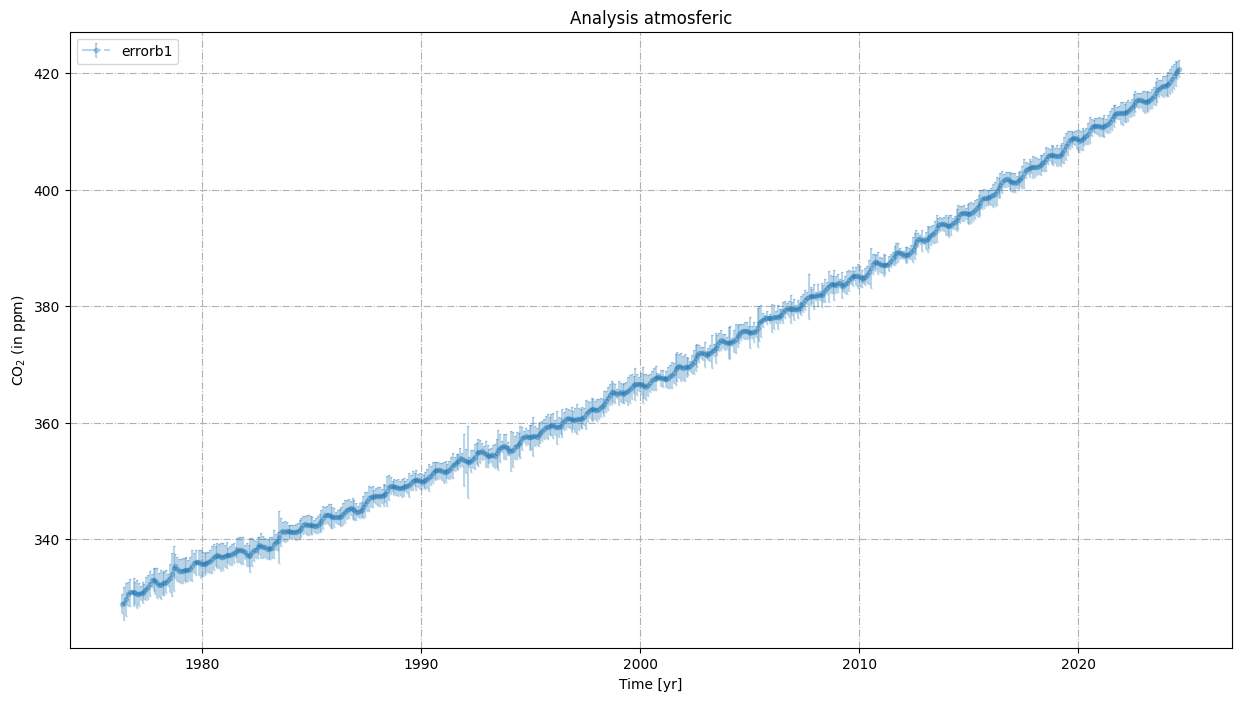

In [6]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')

#The plots:
#Plot the physical model

# plt.plot(date, co2, color = "k", label=' Physical data', linestyle='--')
plt.errorbar(date, co2, st10,  capsize=1, alpha=0.3, marker = ".", label='errorb1', linestyle = "-.")


#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

### (d) How monotonic and linear is the relation between the two variables?


In [7]:
# Let's calculate these coefficients

# 1. Spearman coefficient -> monoticity
sp = st.spearmanr(date, co2)

# 2. Pearson coefficient -> linearity
pe = st.pearsonr(date, co2)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=0.99979570134535, pvalue=0.0)
Pearson:
 PearsonRResult(statistic=0.9952521146194588, pvalue=0.0)


### (e) Now, you will carry out a regression on the data, assuming a simple linear regression model (**"Model 1"**) with 2 free parameters. Carry out a $\chi^2$ minimisation, and report the resulting equation and figure. The figure should have a high-quality, labeled plot of the original data with error bars and the resulting best-fit line.


#### Using curve_fit

In [8]:
# Model function

def model1(x_values, m,b):
    """
    This is our regression model.
    Inputs: x_values (lengths), m,b -> free param.
    Output: y_values model
    """
    y_values = m*date+b
    
    return y_values

In [9]:
# Call the curve_fit function

coef1, cova1 = opt.curve_fit(model1, date, co2)

print("The values for m:",coef1[0]," and b=", coef1[1])

# Calculate uncertainties
unc_coef = np.sqrt(np.diag(cova1))

print(f"The associated uncertainty are:\n for m: {unc_coef[0]} and for b: {unc_coef[1]} \n")
print(f"Which results in: \n m={coef1[0]} +/- {unc_coef[0]} \n b={coef1[1]} +/- {unc_coef[1]}")

The values for m: 1.828892481906203  and b= -3288.7440464950623
The associated uncertainty are:
 for m: 0.007439438153447244 and for b: 14.88291896932504 

Which results in: 
 m=1.828892481906203 +/- 0.007439438153447244 
 b=-3288.7440464950623 +/- 14.88291896932504


In [10]:
model1_ev=model1(date,coef1[0],coef1[1])

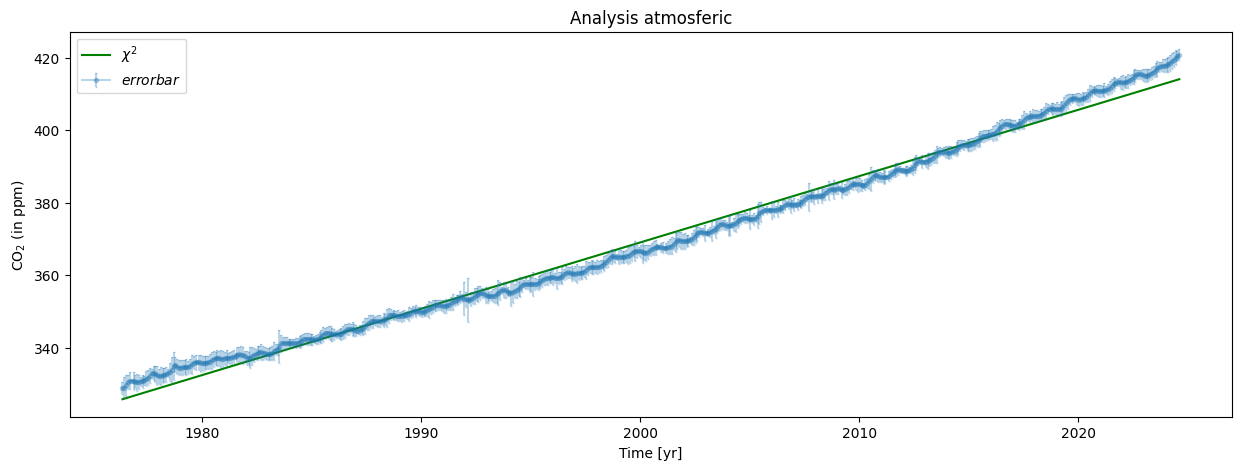

In [11]:
plt.figure(figsize=(15,5))


plt.plot(date, model1_ev, color = "green", label=r"$\chi^2$")
plt.errorbar(date, co2, st10, capsize=1, alpha=0.3,marker = ".", label=r"$error bar$") #, ecolor="#7FFF00"


plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')


plt.legend()
plt.show()

#### Using chi_square minimize

In [12]:
# Define a functional/chi^2 statistic

def chi_sqr_stat(x0):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: x0 -> free param (composed for m & b).
    Output: chi_sqr value
    """
    m, b=x0
    # print("values are: ",m,b)
    # Physically motivated model
    y_values = m * date + b
    
    # Use the chi^2 formula
    chi_sqr = np.sum((co2 - y_values)**2/(st10)**2)
    
    return chi_sqr

In [13]:
# Take the initial guess -> ansatsz (educated guess)
initial_guess =[1.8,-3288]

# Call the minimisation routine
res_pendulum = opt.minimize(chi_sqr_stat, initial_guess)

print(type(res_pendulum))
# Print the result:
print(res_pendulum.x)

<class 'scipy.optimize._optimize.OptimizeResult'>
[ 1.75322359e+00 -3.13728094e+03]


In [14]:
# Evaluate l in the regression model
mean_t_chi = model1(date, res_pendulum.x[0],res_pendulum.x[1])

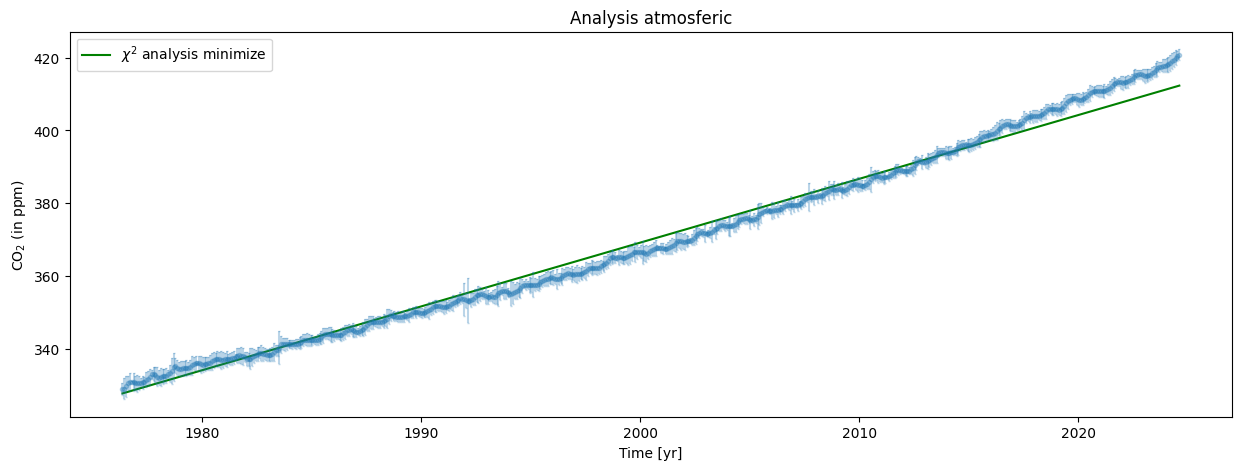

In [15]:
plt.figure(figsize=(15,5))


plt.plot(date, mean_t_chi, color = "green", label=r"$\chi^2$ analysis minimize")
# plt.plot(date, co2, color = "red", linestyle = ":", label=r"$Physical data$")
plt.errorbar(date, co2, st10, capsize=1, alpha=0.3, marker = ".", linestyle = " ")


plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')

plt.legend()
plt.show()

### (f) To perform a goodness-of-fit test, create a python function that calculates the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Briefly comment on your findings, is the linear model a good model?


In [16]:
print("The comparison between minimize and curve fit, for the linear model is:")
# print("The values for ",res_pendulum.x)
# print(coef1)

chi_stat = chi_sqr_stat(res_pendulum.x)
print("chi^2 value with minimize: ", chi_stat)

chi_stat2 = chi_sqr_stat(coef1)
print("chi^2 value with curve_fit: ", chi_stat2)


The comparison between minimize and curve fit, for the linear model is:
chi^2 value with minimize:  2359.3167505218767
chi^2 value with curve_fit:  2831.8166098439638


In [17]:
# Calculate nu:

nu = len(co2) - len(coef1)

print("The # of degrees of freedom is: ", nu)


# Reduced chi^2 value is:

red_chi = chi_stat/nu
red_chi2 = chi_stat2/nu

print("The reduced chi^2 stat for minimize is: ", red_chi)

print("The reduced chi^2 stat for curvefit is: ", red_chi2)

The # of degrees of freedom is:  578
The reduced chi^2 stat for minimize is:  4.081862890176257
The reduced chi^2 stat for curvefit is:  4.899336695231772


### (g) Next, you can propose your own model (**"Model 2"**) for the data. Motivate and write down your model. Then, repeat steps (e) and (f) for your model and compare the reduced $\chi^2$ statistic with that of the linear model. Which model is better? Hint: Keep the model simple with maximum 2 free parameters and avoid overfitting.


#### Model with one parameter:

In [18]:
print(min(date))

1976.3689


In [19]:
# Model function

def model2(x_values, k):
    """
    This is our regression model.
    Inputs: x_values (lengths), beta -> free param.
    Output: y_values model
    """
    
    peak_pair=[min(date),min(co2)]
    # print(peak_pair)
    c=peak_pair[1]*np.exp(-k*peak_pair[0])
    # print(c)
    y_values=c*np.exp(k*date)
    
    
    return y_values


#### Model with two parameter:

In [20]:
# Model function

def model2WOc(x_values, c,k):
    """
    This is our regression model.
    Inputs: x_values (lengths), beta -> free param.
    Output: y_values model
    """
    
    # peak_pair=[min(date),min(co2)]
    # # print(peak_pair)
    # c=peak_pair[1]*np.exp(-k*peak_pair[0])
    # print(c)
    y_values=c*np.exp(k*date)
    
    
    return y_values


In [21]:
y= model2WOc(date,0.00199,0.006)

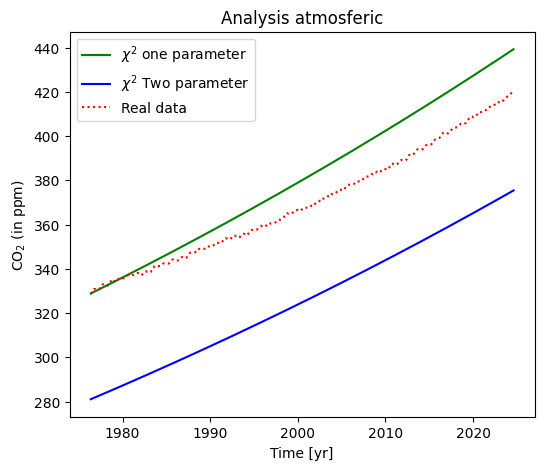

In [22]:
plt.figure(figsize=(6,5))


plt.plot(date, model2(date,0.006), color = "green", label=r"$\chi^2$ one parameter")

plt.plot(date,y, color = "blue", label=r"$\chi^2$ Two parameter")
plt.plot(date, co2, color = "red", linestyle = ":", label=r"Real data")
# plt.errorbar(date, co2, st10, 0,fmt = ".")


plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')


plt.legend()
plt.show()

#### Curve_fit one and two parameter:

In [23]:
# Call the curve_fit function
#Curve_fit for one parameter: y_values=c*np.exp(k*date), c is previously defined
coef2, cova2 = opt.curve_fit(model2, date, co2, p0=[0.006])

print("For the one parameter k is: ",coef2)

# Calculate uncertainties
unc_coef2 = np.sqrt(np.diag(cova2))

print("The associated uncertainty are:\n", unc_coef2)

print(f"Which results in: \n k={coef2[0]} +/- {unc_coef2[0]} ")

For the one parameter k is:  [0.00483181]
The associated uncertainty are:
 [7.27211222e-06]
Which results in: 
 k=0.0048318078315696495 +/- 7.272112217654401e-06 


In [24]:
# Call the curve_fit function
#Curv_fit for two parameters:    y_values=c*np.exp(k*date) c is not defined
coef2WOc, cova2WOc = opt.curve_fit(model2WOc, date, co2, p0=[0.00199,0.006])

# print(coef2WOc)

# Calculate uncertainties
unc_coef2WOc = np.sqrt(np.diag(cova2WOc))

print("The associated uncertainty are:\n", unc_coef2WOc)

print(f"Which results in: \n c={coef2WOc[0]} +/- {unc_coef2WOc[0]} \n k={coef2WOc[1]} +/- {unc_coef2WOc[1]}")

The associated uncertainty are:
 [5.02793578e-04 1.40905139e-05]
Which results in: 
 c=0.01781956214897496 +/- 0.0005027935780906341 
 k=0.004967973140762524 +/- 1.4090513874286189e-05


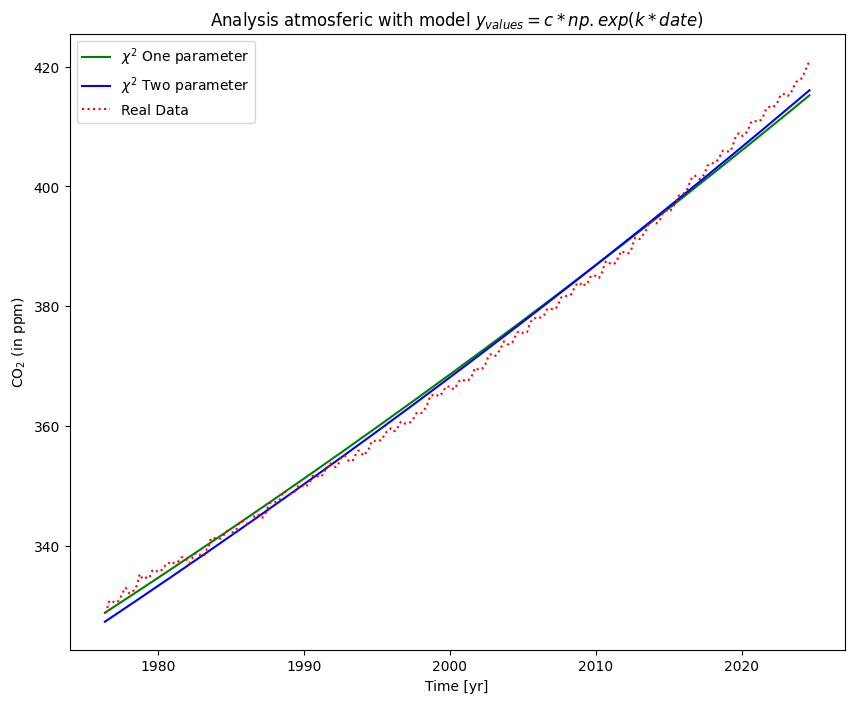

In [25]:
plt.figure(figsize=(10,8))


plt.plot(date, model2(date,coef2), color = "green", label=r"$\chi^2$ One parameter")
plt.plot(date, model2WOc(date,coef2WOc[0],coef2WOc[1]), color = "blue", label=r"$\chi^2$ Two parameter")
plt.plot(date, co2, color = "red", linestyle = ":", label=r"Real Data")
# plt.errorbar(date, co2, st10, 0,fmt = ".")


plt.title(r'Analysis atmosferic with model $y_{values}=c*np.exp(k*date)$')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')


plt.legend()
plt.show()

#### Define model for one and two parameters:

In [26]:
# Define a functional/chi^2 statistic

def chi_sqr_stat2(k):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    # print("values are: ",m,b)
    # Physically motivated model
    
    peak_pair=[min(date),min(co2)]
    # print(peak_pair)
    c=peak_pair[1]*np.exp(-k*peak_pair[0])
    # print(c)
    y_values=c*np.exp(k*date)
    
    # Use the chi^2 formula
    chi_sqr = np.sum((co2 - y_values)**2/(st10)**2)
    
    return chi_sqr

In [27]:
# Define a functional/chi^2 statistic

def chi_sqr_stat2justtoprove(x1):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    # print("values are: ",m,b)
    # Physically motivated model
    c,k=x1
    y_values=c*np.exp(k*date)
    
    # Use the chi^2 formula
    chi_sqr = np.sum((co2 - y_values)**2/(st10)**2)
    
    return chi_sqr

#### Chi SQR Minimize
Note: some values as ansatz are not working well 

In [28]:
# Take the initial guess -> ansatsz (educated guess)
initial_guess2 =[0.00001,0.008]

# Call the minimisation routine
res_pendulum2 = opt.minimize(chi_sqr_stat2justtoprove, initial_guess2)

print(type(res_pendulum2))
# Print the result:
print(res_pendulum2.x)

<class 'scipy.optimize._optimize.OptimizeResult'>
[0.02397588 0.00481966]


In [29]:
# Evaluate coefs in the regression model
mean_t_chi2 = model2WOc(date, res_pendulum2.x[0],res_pendulum2.x[1])

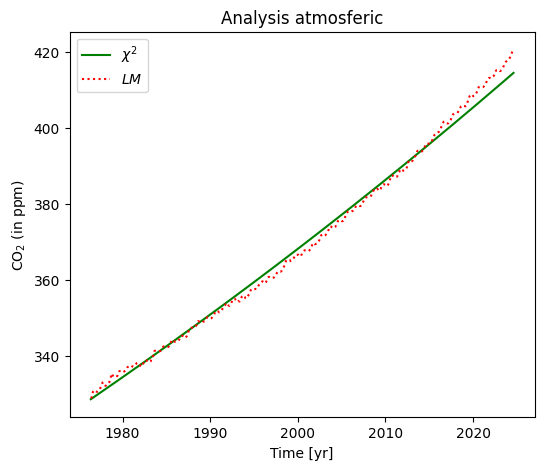

In [30]:
plt.figure(figsize=(6,5))


plt.plot(date, mean_t_chi2, color = "green", label=r"$\chi^2$")
plt.plot(date, co2, color = "red", linestyle = ":", label=r"$LM$")
# plt.errorbar(date, co2, st10, 0, marker = ".", linestyle = " ")


plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')

plt.legend()
plt.show()

#### Comparison of the $\chi^2$ values for the two models with curvefit

In [31]:
#Model with two parameters:
chi_stat2_2WOcmin = chi_sqr_stat2justtoprove(res_pendulum2.x)
print("chi^2 value with minimize: ", chi_stat2_2WOcmin)

chi^2 value with minimize:  1202.6493873624026


In [32]:
#Model with two parameters:
chi_stat2_2WOc = chi_sqr_stat2justtoprove(coef2WOc)
print("chi^2 value with curve_fit: ", chi_stat2_2WOc)

chi^2 value with curve_fit:  1412.8154338172303


In [33]:
#Model with one parameter:
chi_stat2_2 = chi_sqr_stat2(coef2)
print("chi^2 value with curve_fit: ", chi_stat2_2)

chi^2 value with curve_fit:  1252.0051954439077


#### Calculate degrees of freedom and the reduced $\chi^2$

In [34]:
# Calculate nu:

nu2 = len(date) - len(coef2)

nu2WOc = len(date) - len(coef2WOc)

nu2WOcmin = len(date) - len(res_pendulum2.x)

print("The # of degrees of freedom is: ", nu2)

print("The # of degrees of freedom WOc is: ", nu2WOc)
print("The # of degrees of freedom WOc is: ", nu2WOcmin)


# Reduced chi^2 value is:

# red_chi = chi_stat/nu
red_chi2_2 = chi_stat2_2/nu

red_chi2_2WOc = chi_stat2_2WOc/nu2WOc

red_chi2_2WOcmin = chi_stat2_2WOc/nu2WOcmin

# print("The reduced chi^2 stat for minimize is: ", red_chi)

print("The reduced chi^2 stat for curvefit (one parameter) is: ", red_chi2_2)

print("The reduced chi^2 stat for curvefit WOc (two parameters) is: ", red_chi2_2WOc)

print("The reduced chi^2 stat for minimize WOc (two parameters) is: ", red_chi2_2WOcmin)

The # of degrees of freedom is:  579
The # of degrees of freedom WOc is:  578
The # of degrees of freedom WOc is:  578
The reduced chi^2 stat for curvefit (one parameter) is:  2.1660989540552036
The reduced chi^2 stat for curvefit WOc (two parameters) is:  2.4443173595453813
The reduced chi^2 stat for minimize WOc (two parameters) is:  2.4443173595453813


### (h) Finally, you will construct **2D confidence intervals** using the $\chi^2$ statistic evaluated in the vicinity of the best-fit values for the free parameters of Models 1 and 2. Since both models have two free parameters, you should create python functions that compute and return the 2D $\chi^2$ surface of each model onto the respective parameter space. Hints: to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each parameter may help identify optimal numbers.


In [35]:
#Model y=mx+b, use for curve fit
print("For model 1, using curve_fit:", coef1)

#Model chi_sqr_stat y-mx+b, but for use with minimize:
print("For model 1 using minimize: ", res_pendulum.x)

#Just using curve_fit:
#model  y_values=c*np.exp(k*date) but just for k:
print("For model 2 using curve_fit just one free parameter k:", coef2)

#model  y_values=c*np.exp(k*date) but just for c & k:
print("For model 2 using curve_fit two free parameter c & k:", coef2WOc)

#Using minimize
#model  y_values=c*np.exp(k*date) but just for c & k:
print("For model 2 using minimize two free parameter c & k:", res_pendulum2.x)

For model 1, using curve_fit: [ 1.82889248e+00 -3.28874405e+03]
For model 1 using minimize:  [ 1.75322359e+00 -3.13728094e+03]
For model 2 using curve_fit just one free parameter k: [0.00483181]
For model 2 using curve_fit two free parameter c & k: [0.01781956 0.00496797]
For model 2 using minimize two free parameter c & k: [0.02397588 0.00481966]


#### Model 1 using curve fit

CAMBIAR EL RANGO DE LOS VECTORES M Y B
$y=mx+b$

In [36]:
#For model y=mx+b
# Vector for chi^2
m_vector_m1 = np.linspace(coef1[0]-(2*unc_coef[0]), coef1[0]+(2*unc_coef[0]), 1000)
b_vector_m1 = np.linspace(coef1[1]-(2*unc_coef[1]), coef1[1]+(2*unc_coef[1]), 1000)

# print(m_vector_m1.shape, b_vector_m1.shape)
# Evaluate our functional using the above vector
# mixed=
# Empty list
chi_vector = []
for i in range(len(m_vector_m1)):
    chi_vector.append(chi_sqr_stat([m_vector_m1[i],b_vector_m1[i]]))

chi_vector = np.array(chi_vector)
print(m_vector_m1.shape, chi_vector.shape)
# print(m_vector_m1)

(1000,) (1000,)


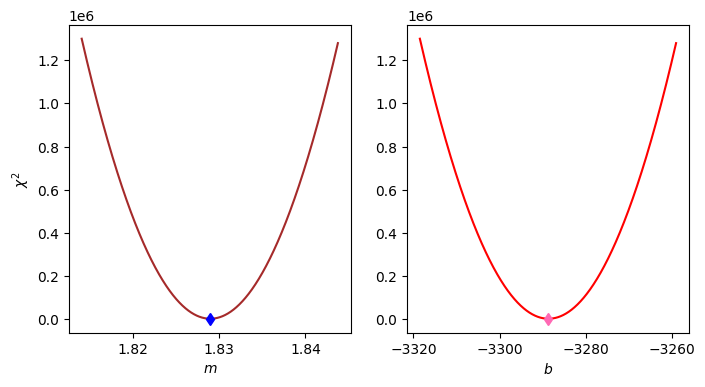

In [37]:
# Plotting chi^2
# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

plt.plot(m_vector_m1, chi_vector, color = "brown", linestyle = "-")

plt.plot(coef1[0], chi_stat2, color = "blue", linestyle = " ",\
        marker = "d")

plt.xlabel(r"$m$")
plt.ylabel(r"$\chi^2$")

# Plotting chi^2
plt.subplot(1,2,2)


plt.plot(b_vector_m1, chi_vector, color = "red", linestyle = "-")

plt.plot(coef1[1], chi_stat2, color = "hotpink", linestyle = " ",\
        marker = "d")

plt.xlabel(r"$b$")

# plt.legend()
plt.show()
plt.close()

In [38]:
#combining the two arrays:
m_grid, b_grid = np.meshgrid(m_vector_m1, b_vector_m1)
print(m_grid.shape, b_grid.shape)

#combine the arrays for chi:
chi_grid_m1=np.empty((m_grid.shape[0],m_grid.shape[0]))

for i in range(m_grid.shape[0]):
    for j in range(m_grid.shape[1]):
        chi_grid_m1[i,j]=chi_sqr_stat([m_grid[i,j],b_grid[i,j]])
        
# chi_grid_m1=chi_sqr_stat(m_grid,b_grid)
print(chi_grid_m1.shape)

(1000, 1000) (1000, 1000)
(1000, 1000)


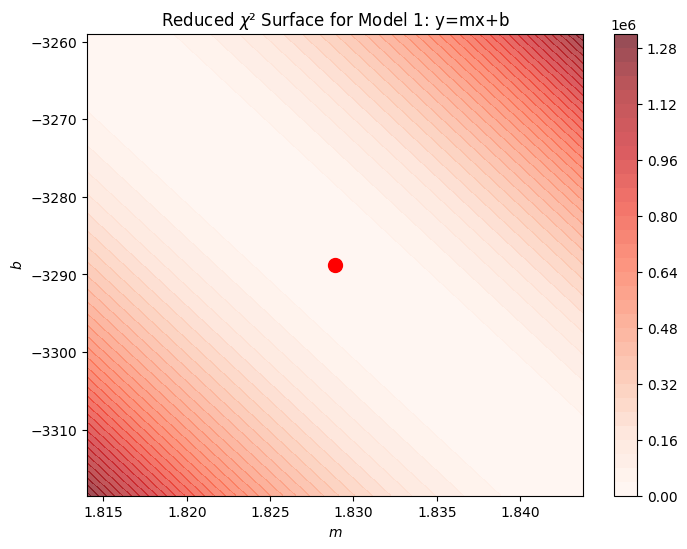

In [39]:
#Lineal
fig, ax = plt.subplots(figsize=(8, 6))

contourf = ax.contourf(m_grid, b_grid, chi_grid_m1,  cmap="Reds", alpha=0.7, levels=40)

ax.scatter(coef1[0], coef1[1], color='red', marker='o', s=100, label='Min $\chi^2$' )

ax.set_xlabel(r'$m$ (free parameter 1)')
ax.set_ylabel(r'$m$ (free parameter 2)')

ax.set_title('2D Contour Projection with Confidence Levels')

ax.set_title(r"Reduced $\chi²$ Surface for Model 1: y=mx+b")
ax.set_xlabel(r"$m$")
ax.set_ylabel(r"$b$")
plt.colorbar(contourf)
plt.show()


#### Model 2 using curve fit and two free parameters:
CAMBIAR EL RANGO DE LOS VECTORES C Y K

$ y_{values}=c*np.exp(k*date)$

In [40]:
#For model y=mx+b
# Vector for chi^2
c_vector_m2 = np.linspace(coef2WOc[0]-(2*unc_coef2WOc[0]), coef2WOc[0]+(2*unc_coef2WOc[0]), 200)
k_vector_m2 = np.linspace(coef2WOc[1]-(2*unc_coef2WOc[1]), coef2WOc[1]+(2*unc_coef2WOc[1]), 200)

# print(m_vector_m1.shape, b_vector_m1.shape)
# Evaluate our functional using the above vector
# mixed=
# Empty list
chi_vector_m2 = []
for i in range(len(c_vector_m2)):
    chi_vector_m2.append(chi_sqr_stat2justtoprove([c_vector_m2[i],k_vector_m2[i]]))

chi_vector_m2 = np.array(chi_vector_m2)
print(c_vector_m2.shape, chi_vector_m2.shape)

(200,) (200,)


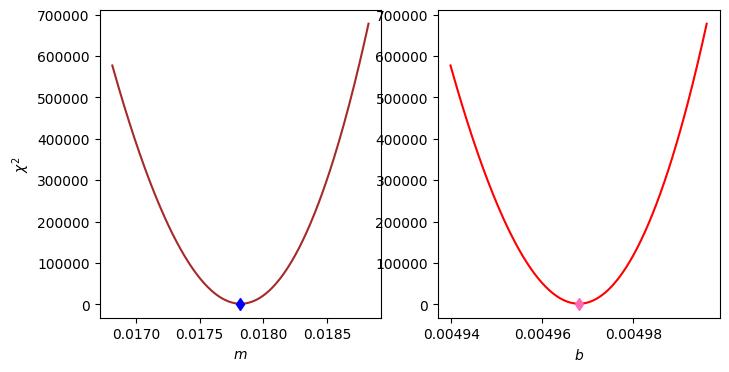

In [41]:
# Plotting chi^2
# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

plt.plot(c_vector_m2, chi_vector_m2, color = "brown", linestyle = "-")

plt.plot(coef2WOc[0], chi_stat2_2WOc, color = "blue", linestyle = " ",\
        marker = "d")

plt.xlabel(r"$m$")
plt.ylabel(r"$\chi^2$")

# Plotting chi^2
plt.subplot(1,2,2)


plt.plot(k_vector_m2, chi_vector_m2, color = "red", linestyle = "-")

plt.plot(coef2WOc[1], chi_stat2_2WOc, color = "hotpink", linestyle = " ",\
        marker = "d")

plt.xlabel(r"$b$")

# plt.legend()
plt.show()
plt.close()

In [42]:
#combining the two arrays:
c_grid, k_grid = np.meshgrid(c_vector_m2, k_vector_m2)
print(c_grid.shape, k_grid.shape)

#combine the arrays for chi:
chi_grid_m2=np.empty((c_grid.shape[0],c_grid.shape[0]))

for i in range(c_grid.shape[0]):
    for j in range(k_grid.shape[1]):
        chi_grid_m2[i,j]=chi_sqr_stat2justtoprove([c_grid[i,j],k_grid[i,j]])
        
# chi_grid_m1=chi_sqr_stat(m_grid,b_grid)
print(chi_grid_m2.shape)

(200, 200) (200, 200)
(200, 200)


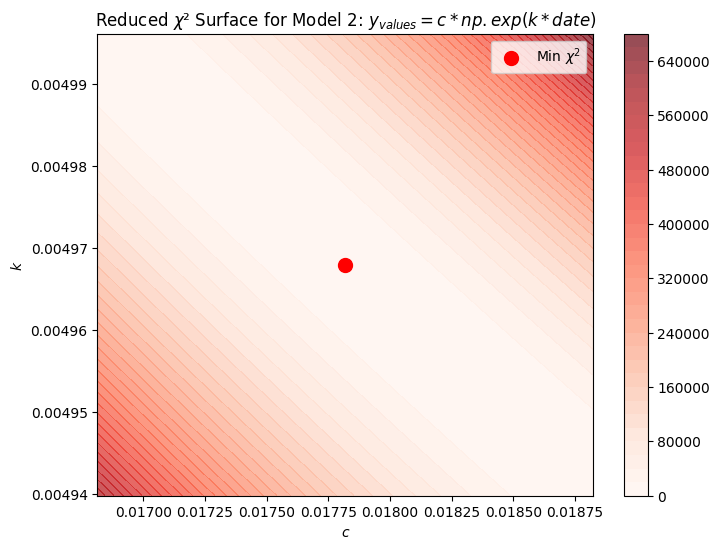

In [43]:
#Exponential:
fig, ax = plt.subplots(figsize=(8, 6))

contourf = ax.contourf(c_grid, k_grid, chi_grid_m2,  cmap="Reds", alpha=0.7, levels=40)



ax.scatter(coef2WOc[0], coef2WOc[1], color='red', marker='o', s=100, label='Min $\chi^2$')




ax.set_title(r"Reduced $\chi²$ Surface for Model 2: $ y_{values}=c*np.exp(k*date)$")
ax.set_xlabel(r"$c$")
ax.set_ylabel(r"$k$")

ax.legend(fontsize = 10)
plt.colorbar(contourf)
plt.show()


#### (i) Make a high-quality, labeled, multi-panel figure showing the 2D $\chi^2$ surface of each model: first in 3D, and then in projection with a marker showing the minimum and overimposed contours indicating at least two confidence levels. Briefly comment on your results highlighting the differences between the confidence intervals of both models. What do these confidence intervals tell us? Hint: the maps should have one of the free parameters in the X axis, the other free parameter in the Y axis, and the $\chi^2$ surface in the Z axis.

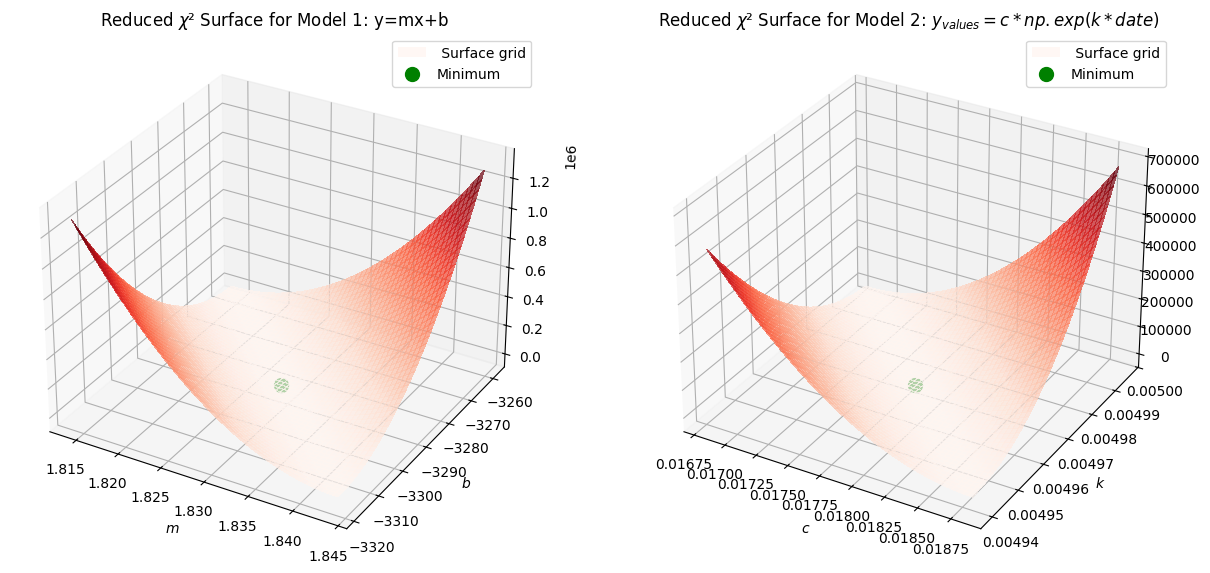

In [44]:

# Plotting with a figure environment
fig, (ax1,ax2) = plt.subplots(1, 2,subplot_kw={"projection": "3d"}, figsize=(15,8))


surf1 = ax1.plot_surface(m_grid, b_grid, chi_grid_m1, alpha = 0.7, cmap = "Reds", antialiased=False, label= " Surface grid" )
ax1.scatter(coef1[0],coef1[1], chi_stat2 ,marker='o',s=100, color='green', label="Minimum")
ax1.set_title(r"Reduced $\chi²$ Surface for Model 1: y=mx+b")
ax1.set_xlabel(r"$m$")
ax1.set_ylabel(r"$b$")

surf2 = ax2.plot_surface(c_grid, k_grid, chi_grid_m2, alpha = 0.7, cmap = "Reds", antialiased=False, label= " Surface grid" )
ax2.scatter(coef2WOc[0],coef2WOc[1], chi_stat2_2WOc ,marker='o',s=100, color='green', label="Minimum")
ax2.set_title(r"Reduced $\chi²$ Surface for Model 2: $ y_{values}=c*np.exp(k*date)$")
ax2.set_xlabel(r"$c$")
ax2.set_ylabel(r"$k$")

ax1.legend()
ax2.legend()

plt.show()

## Problem 2. (5 points) Interpolation: Greenhouse Gases

In this problem, you will calculate and compare the amount of heating produced by three greenhouse gases:

- $\rm CO_2$, which you already analysed in the previous problem.

- $\rm CH_4$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CH4_data_download.csv

- $\rm N_2O$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_N2O_data_download.csv

All the data were taken by the same monitoring station in Australia. The new files for $\rm CH_4$ and $\rm N_2O$ have the same structure as the file for $\rm CO_2$, but the concentrations and standard deviations are in units of $\rm ppb$.

### Tasks:



### (a) Repeat steps (a), (b) and (c) of problem 1 for $\rm CH_4$ and $\rm N_2O$. Which of the 3 greenhouse gases has higher and lower concentrations in the atmosphere? How many $\rm dex$ apart are their concentrations? 


In [45]:
# Read units.out file

# df_units = pd.read_csv(fname)

# print(df_units. head(25))
fname2 = "CapeGrim_CH4_data_download.csv"
fname3 = "CapeGrim_N2O_data_download.csv"
df2, ch4, sd2, date2=IO(fname2, 'CH4(ppb)','SD(ppb)')

df3, n2o, sd3, date3=IO(fname3, 'N2O(ppb)','SD(ppb)')	
print("\n")
print("This is the df:")
date=date.astype(float)

# print(sd3)





This is the df:


In [46]:
#For the b the standar deviations *10
st10_df2=sd2*10
st10_df3=sd3*10

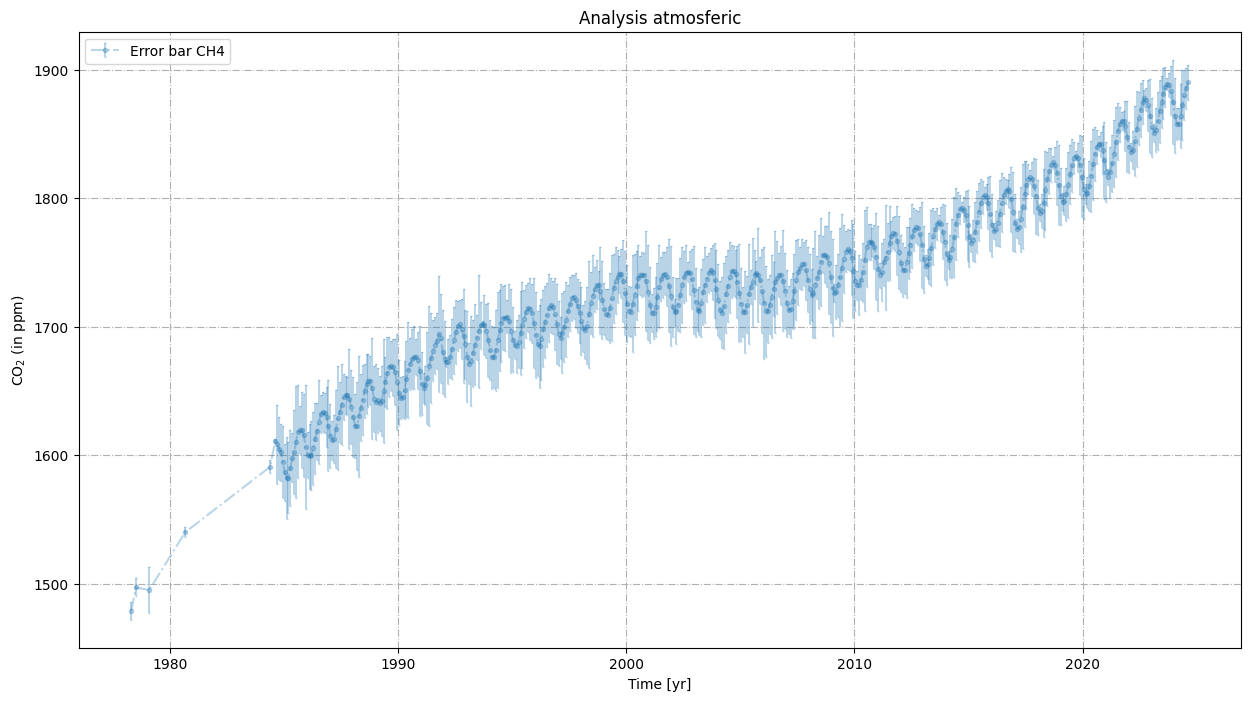

In [47]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')

#The plots:
#Plot the physical model

# plt.plot(date, co2, color = "k", label=' Physical data', linestyle='--')
plt.errorbar(date2, ch4, st10_df2,  capsize=1, alpha=0.3, marker = ".", label='Error bar CH4', linestyle = "-.")

# plt.errorbar(date3, n2o, st10_df3,  capsize=1, alpha=0.3, marker = ".", label='Error bar N2O', linestyle = "-.")


#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

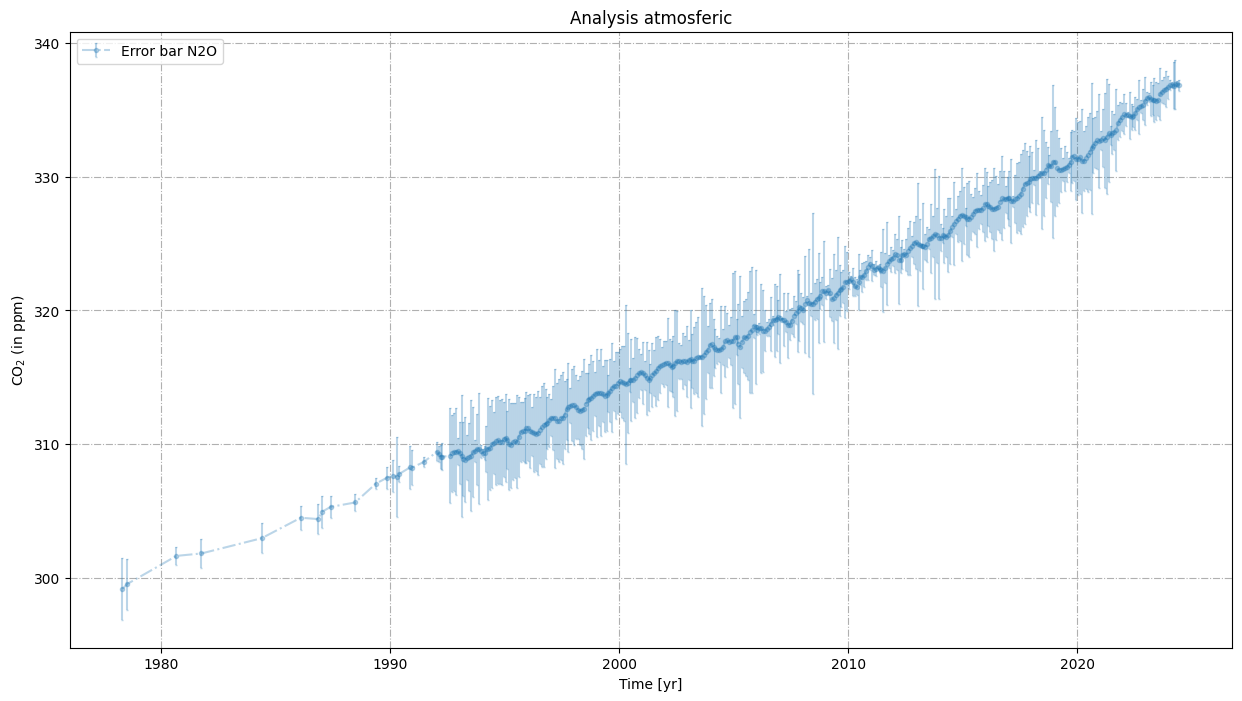

In [48]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\text{CO}_2$ (in ppm)')

#The plots:
#Plot the physical model

# plt.plot(date, co2, color = "k", label=' Physical data', linestyle='--')
# plt.errorbar(date2, ch4, st10_df2,  capsize=1, alpha=0.3, marker = ".", label='Error bar CH4', linestyle = "-.")

plt.errorbar(date3, n2o, st10_df3,  capsize=1, alpha=0.3, marker = ".", label='Error bar N2O', linestyle = "-.")


#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

### (b) Now, you will compute the amount of heat (energy) trapped by the greenhouse gases in the atmosphere by computing the so-called **radiative forcing** ($\Delta F$), which refers to the change in energy balance in the atmosphere due to greenhouse gas concentrations. For each gas the semi-empirical functions read:

- For $\rm CO_2$: $\Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right)$, where: $\Delta F_{\text{CO}_2}$ is the radiative forcing due to carbon dioxide ($\rm W/m^2$), $\alpha = 5.35 \, \rm W/m^2$, $C$ is the ctime-dependent concentration of $\text{CO}_2 $ in $\rm ppm$, and $C_0$ is the pre-industrial concentration of $\text{CO}_2$ in $\rm ppm$ (typically $=280$).

- For $\text{CH}_4$: $\Delta F_{\text{CH}_4} = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right)$, where: $\Delta F_{\text{CH}_4}$ is the radiative forcing due to methane ($\rm W/m^2$), $\beta = 0.036 \, \rm W/m^2 $, $M$ is the time-dependent concentration of $\rm CH_4$ in ppb, and $M_0$ is the pre-industrial concentration of $\text{CH}_4$ in $\rm ppb$ (typically $=700$).

- For $\rm N_2O$: $\Delta F_{\text{N}_2\text{O}} = \gamma \cdot \left(\sqrt{N} - \sqrt{N_0}\right)$, where: $\Delta F_{\text{N}_2\text{O}} $ is the radiative forcing due to nitrous oxide ($\rm W/m^2$), $\gamma = 0.12 \, \rm W/m^2$, $N$ is the time-dependent concentration of $\rm N_2O$ in ppb, $N_0$ is the pre-industrial concentration of $\text{N}_2\text{O}$ in $\rm ppb$ (typically $=270$).

The full expressions can be found in this paper (see table 1): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930


In [49]:
#Define the constants:
alpha = 5.35
beta = 0.036
gamma = 0.12

c0 = 280
m0 = 700
n0 = 270

def deltaF(c,m,n):
    difFco2 = alpha*np.log(c/c0) 
    difFch4 = beta*(np.sqrt(m)-np.sqrt(m0))
    difFn2o = gamma*(np.sqrt(n)-np.sqrt(n0))
    return difFco2, difFch4, difFn2o
deltaCO2, deltaCH4, deltaNO2 =  deltaF(co2, ch4, n2o) 
# print(deltaCH4)

### (c) Make a single high-quality, labeled plot showing the **radiative forcings** ($\Delta F$) of all three greenhouse gases in units of $\rm W/m^2 $ (including the y-error bars) versus time. How many $\rm dex$ apart are their contributions? Compare with your dex analysis in point (a) and discuss which gas has a higher warming potential.


In [50]:
sd2_10=sd2*10
sd3_10=sd3*10
# print(st10)

##### Aplying the propagation of errors:
$$ a * ln(bA) \rightarrow \Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right) \rightarrow \sigma_{\Delta F_{\text{CO}_2}}= |\frac{\alpha}{C}\sigma_{CO_2} | $$
And for $CH_4 $ and $N_2O$:
$$  \Delta_F = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right) \rightarrow  \sigma_{\Delta F}= \frac{\beta}{2\sqrt{M}}\sigma_M$$

$$
\sigma_{\Delta_{F_{CO_2}}} = |\frac{\alpha}{C}\sigma_c | 
$$

For $\Delta F_{CH_4}$, and $\Delta F_{N_2O}$: 

$$
\sigma_{\Delta F} = \frac{\beta}{2\sqrt{M}}\sigma_M
$$

In [51]:
#Global uncertainties:
desv_prop_co2 = np.abs((alpha*st10)/co2)

desv_prop_ch4 = (beta/(2*np.sqrt(ch4)))*sd2_10

desv_prop_n2o = (gamma/(2*np.sqrt(n2o)))*sd3_10

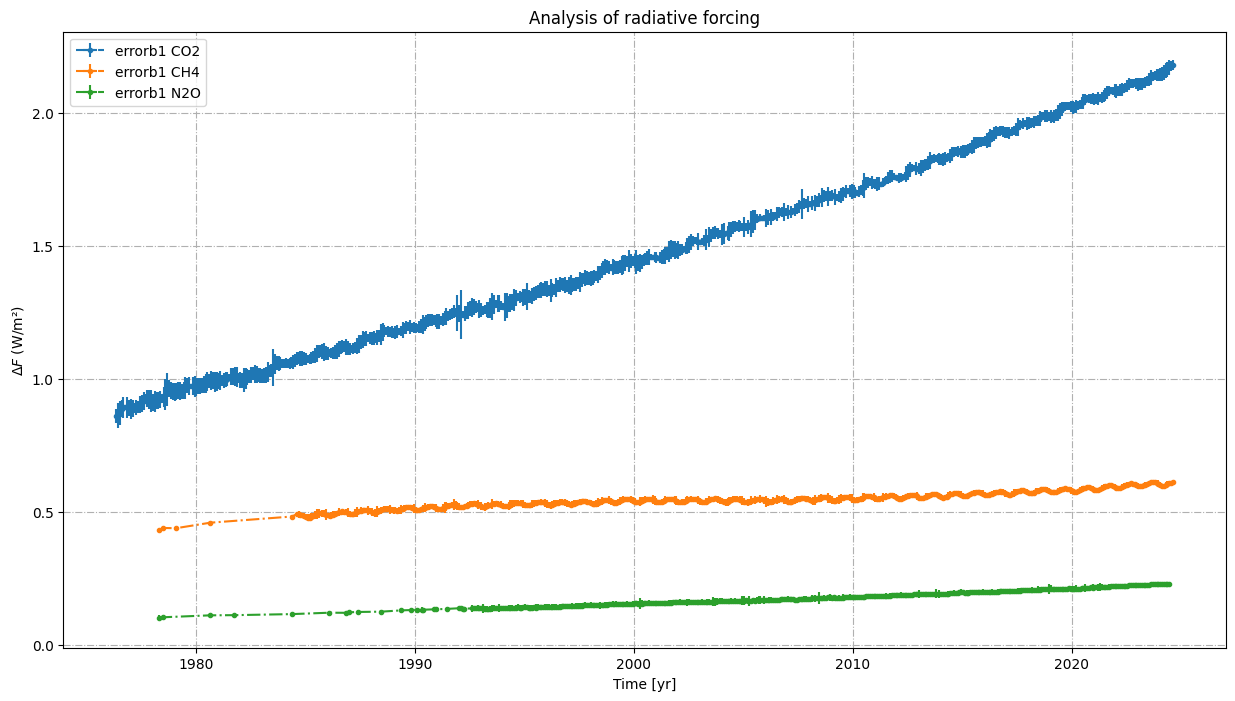

In [52]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis of radiative forcing')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\Delta F$ (W/m²)')

#The plots:
#Plot the physical model
plt.errorbar(date, deltaCO2, desv_prop_co2, 0, marker = ".", label='errorb1 CO2', linestyle = "-.")
plt.errorbar(date2, deltaCH4, desv_prop_ch4, 0, marker = ".", label='errorb1 CH4', linestyle = "-.")
plt.errorbar(date3, deltaNO2, desv_prop_n2o, 0, marker = ".", label='errorb1 N2O', linestyle = "-.")

# plt.plot(date, co2, color = "k", label=' Physical data CO2', linestyle='--')

# plt.plot(date2, ch4, color = "k", label=' Physical data CH4', linestyle='--')

# plt.plot(date3, n2o, color = "k", label=' Physical data N2O', linestyle='--')

#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

Due to dex is the difference in log scale of magnitude orders, we are going to project the mean of each one to take that to check the magnitude order

In [53]:
#Comparison of the dex of each one:
#Define max and min
maxco2 = co2.max()
maxch4 = ch4.max()
maxn2o = n2o.max()
minco2 = co2.min()
minch4 = ch4.min()
minn2o = n2o.min()

dex_co2 = np.log(maxco2/co2[0])

dex_ch4 = np.log(maxch4/ch4[0])

dex_n2o = np.log(maxn2o/n2o[0])


print(f"The dex for CO2: {dex_co2}")
print(f"The dex for CH4: {dex_ch4}")
print(f"The dex for N2O: {dex_n2o}")
#Means:
mean_value_co2= co2.mean()
mean_value_ch4= ch4.mean()
mean_value_n2o= n2o.mean()


dex_ch42_co2= np.log(mean_value_ch4/mean_value_co2)

dex_ch4_n2o= np.log(mean_value_ch4/mean_value_n2o)

dex_co2_n2o= np.log(mean_value_ch4/mean_value_n2o)

print("\n")
print(f"The dex for CH4 to CO2: {dex_ch42_co2}")
print(f"The dex for CH4 to N2O: {dex_ch4_n2o}")
print(f"The dex for CO2 to N2O: {dex_co2_n2o}")

The dex for CO2: 0.2465605144252442
The dex for CH4: 0.24525297248940992
The dex for N2O: 0.11876075422038727


The dex for CH4 to CO2: 1.5442502789463126
The dex for CH4 to N2O: 1.6874055718085645
The dex for CO2 to N2O: 1.6874055718085645


### (d) Now, you need to calculate a **total radiative forcing** ($\Delta F_{\rm total}$) by adding all contributions, but you will notice the data sampling and time arrays do not match. Therefore, before you add the contributions, you will first need to interpolate the individual gas data onto a unified time domain. To achieve this, you should generate a new time array with a 1-year spacing. Then, use **scipy** to interpolate the **radiative forcings** ($\Delta F$) of each gas onto the new time array. Report the interpolation results in a single figure showing the original data and the interpolated data.



In [54]:
#Check the max date:
print("MAX:" )
print(date.max(),date2.max(),date3.max())
print("MIN")

print(date.min(),date2.min(),date3.min())
print("Length:", len(date),len(date2),len(date3))

years_array = np.arange(math.trunc(date.min())+3,math.trunc(date.max()))
print(years_array)

interpolate_co2 = interp.interp1d(date, co2, kind = "linear", fill_value=" extrapolate")

interpolate_ch4 = interp.interp1d(date2, ch4, kind = "linear", fill_value= " extrapolate")
interpolate_n2o = interp.interp1d(date3, n2o, kind = "linear", fill_value= " extrapolate")

#Use the interpolation functions
delFco2 = interpolate_co2(years_array)
delFch4 = interpolate_ch4(years_array)
delFn2o = interpolate_n2o(years_array)

MAX:
2024.62022 2024.62022 2024.453552
MIN
1976.3689 1978.3178 1978.3178
Length: 580 486 405
[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]


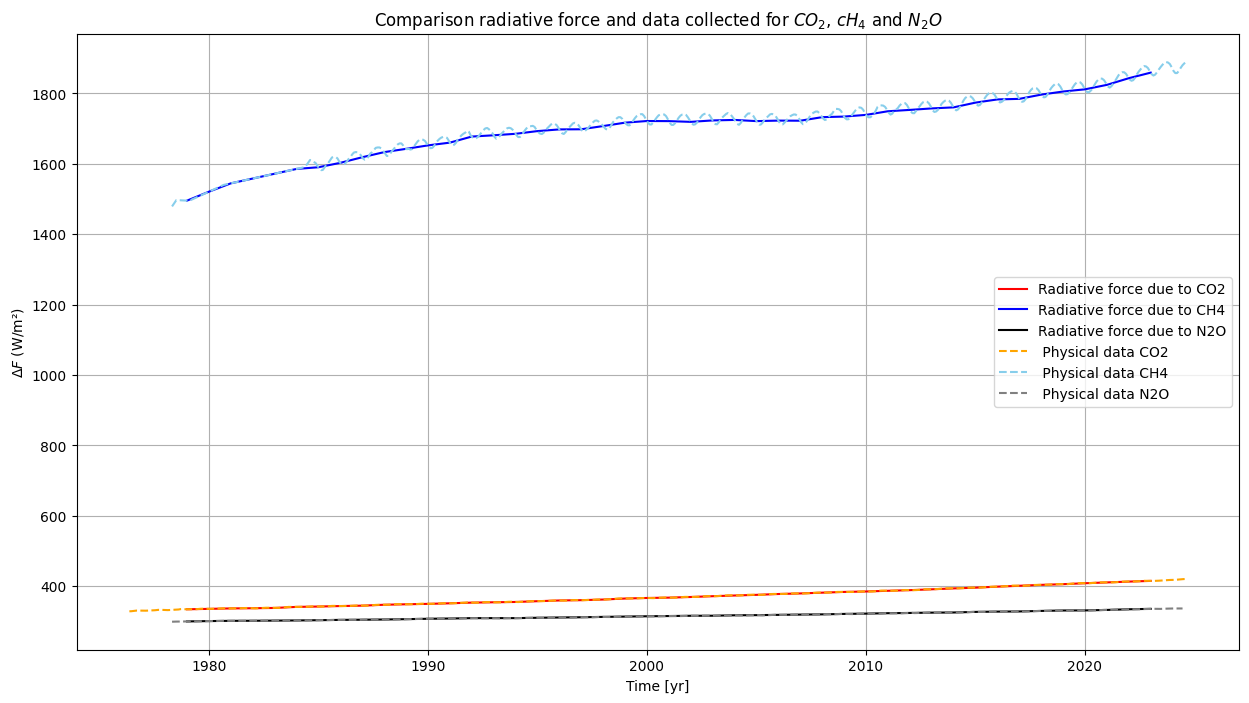

In [55]:
# Plotting the result

plt.figure(figsize=(15,8))

plt.title(r'Comparison radiative force and data collected for $CO_2$, $cH_4$ and $N_2O$')
plt.xlabel(r'Time [yr]')

plt.ylabel(r'$\Delta F$ (W/m²)')
plt.plot(years_array, delFco2, color = "red", linestyle = "-"\
        , label = "Radiative force due to CO2")
plt.plot(years_array, delFch4, color = "blue", linestyle = "-"\
        , label = "Radiative force due to CH4")
plt.plot(years_array, delFn2o, color = "k", linestyle = "-"\
        , label = "Radiative force due to N2O")


plt.plot(date, co2, color = "orange", label=' Physical data CO2', linestyle='--')

plt.plot(date2, ch4, color = "skyblue", label=' Physical data CH4', linestyle='--')

plt.plot(date3, n2o, color = "gray", label=' Physical data N2O', linestyle='--')

plt.grid()


plt.legend()
plt.show()


### (e) Finally, use the interpolated data to calculate the **total radiative forcing** ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$). Report the result in a high-quality, labeled plot of $\Delta F_{\rm global}$ (in $\rm W/m^2$) versus time in years.

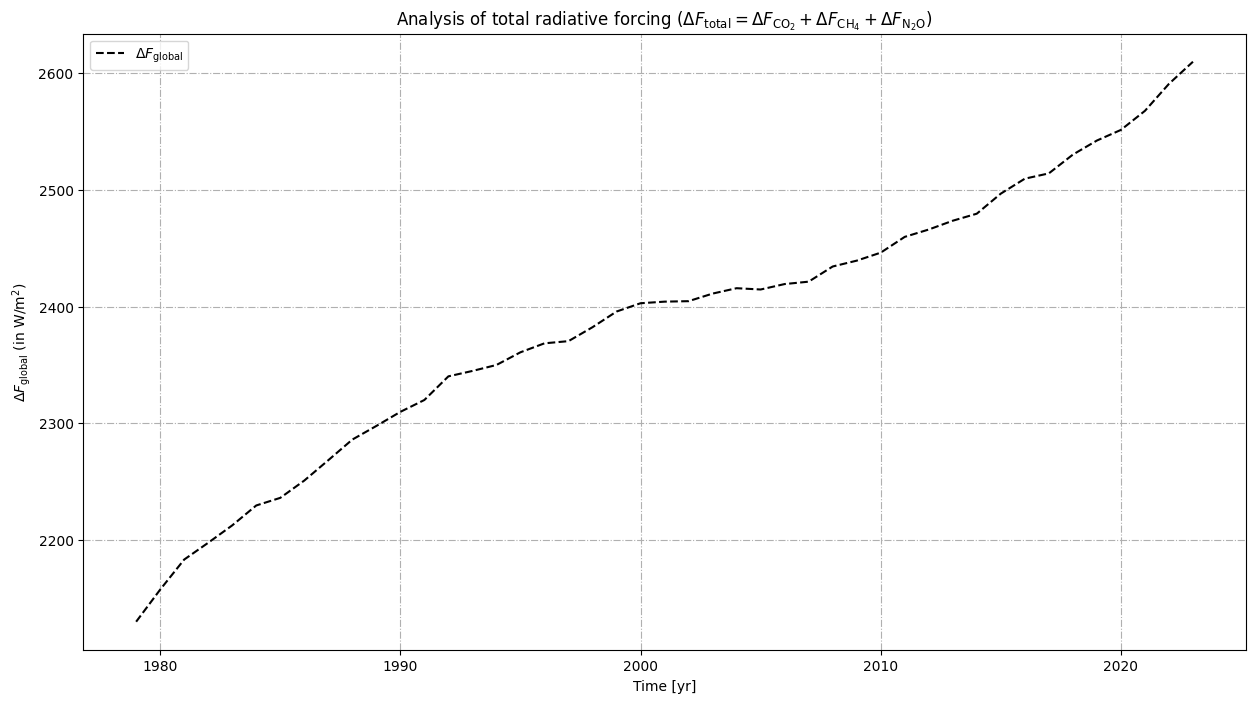

In [56]:
delsumF = delFco2 + delFch4 + delFn2o
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title(r'Analysis of total radiative forcing ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$)')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\Delta F_{\rm global}$ (in $\rm W/m^2$)')

#The plots:
#Plot the physical model

plt.plot(years_array, delsumF, color = "k", label=r'$\Delta F_{\rm global}$', linestyle='--')

#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

Extra Steps to make the extrapolation

In [57]:
def linear_fit_real(delsumF, m,b):
    y_values = m* delsumF+b
    return y_values

In [58]:
# Call the curve_fit() function
coef_radiat_f, cova_radiat_f = opt.curve_fit(linear_fit_real, years_array, delsumF)
print(coef_radiat_f)

# Calculate uncertainties
unc_coef_radiat_f = np.sqrt(np.diag(cova_radiat_f))

print("The associated uncertainty are:\n", unc_coef_radiat_f)
# print(newarray_delsumF[0], newarray_medianTemp.shape)

[ 8.91079342e+00 -1.54437920e+04]
The associated uncertainty are:
 [2.46841152e-01 4.93939547e+02]


In [59]:
position_fit = linear_fit_real(years_array, *coef_radiat_f)

In [60]:
# Extrapolate data to t=10s.
time_ext = 2100.

# Evaluate the model -> Extrapolated position
position_ext = linear_fit_real(time_ext, *coef_radiat_f)

print(position_ext)

# Generate a new vector for time
new_time = np.linspace(years_array[0], time_ext, 1000)

# Evaluate the model
new_posi = linear_fit_real(new_time, *coef_radiat_f)

print(new_posi.shape)

3268.8741955127934
(1000,)


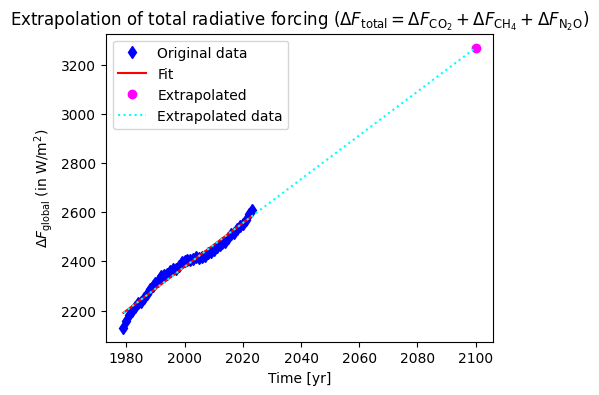

In [61]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(years_array,delsumF,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(years_array,position_fit,color='red', linestyle="-", label="Fit")
plt.plot(time_ext, position_ext, color = "magenta", marker = "o", linestyle=" ", label="Extrapolated")

plt.plot(new_time,new_posi,color='aqua', linestyle=":", label ="Extrapolated data")#, label ="Extrapolated data"

plt.title(r'Extrapolation of total radiative forcing ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$)')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\Delta F_{\rm global}$ (in $\rm W/m^2$)')
plt.legend()

plt.show()

## Problem 3. (6 points) Extrapolation: Global Warming

In this problem, you will study the correlation between the total radiative forcing ($\Delta F_{\rm total}$) and the sea temperature anomaly, which is an indicator of global warming. The sea temperature anomaly ($\Delta T_{\rm sea}$ in $\rm ^{\circ}C$) is measured with respect to the average global sea surface temperature (SST) in the 1961-1990 period ($=13.97\,\rm ^{\circ}C$). The observed data values are reported in this file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/temperature-anomaly.csv

The file was taken from: https://ourworldindata.org

### Tasks:



### (a) Create a python function that reads in the **temperature-anomaly.csv** file, selects the rows corresponding to the "Southern Hemisphere" anomaly, and returns the median temperature anomaly and symmetric $2\sigma$ y-errors computed from the upper and lower bounds given in the file. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.


In [62]:
# Funtion
def slice_data(dataset, column_name, country_name):
    """
    """
    # Simply
    country_data = dataset[dataset[column_name] == country_name]

    return country_data

In [63]:
path_temp_anom= "temperature-anomaly.csv"

In [64]:
def IOtemp_anomally(path, data, sitetoget):
    """
    Input:
        path= the direction where we are going to get the information.
        data= is what we measure in this datasets
    Data:
        df= create the data frame
        titles define new titles
        dataframe  where we are goung to work changing the titles and size
    Output: 
        dataframe= The data frame
        date= array of the Dates
        d14C_trend= data that we are interested in.
    """
    df=pd.read_csv(path)
    # title = df[data]
    # print("title", title)
    location = df[df[data] == sitetoget]
    # upper_bound_From_location= location["Upper bound (95% Cl)"]
    upper_bound_From_location = np.array(location.iloc[:,-2])
    median_temp_From_location = np.array(location.iloc[:,-3])
    # print(upper_bound_From_location)
    #np.array(location["Upper bound (95% Cl)"])
    # date = np.array(dataframe['DATE'])
    year = np.array(location["Year"])
    lower_bound_From_location = np.array(location.iloc[:,-1])
    # print(upper_bound_From_location.shape)
    # print(lower_bound_From_location.shape)
    # test= abs((upper_bound_From_location+lower_bound_From_location)/2)
    test= (upper_bound_From_location-lower_bound_From_location)/2
    # avg_up_low=
    print(test.shape)
    # date = date.astype(float)
    # data_y = data_y.astype(float)
    # sd = sd.astype(float)
    return df, location, test,year, median_temp_From_location

In [65]:
column = 'Entity'
temp_a_df, location, y_errors, year,medianTemp = IOtemp_anomally(path_temp_anom, column, "Southern Hemisphere")
# print("HERE>...",location)
# print(y_errors.shape, year.shape, type(medianTemp))

(170,)


### (b) Make a high-quality, labeled figure of the sea temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including the symmetric $2\sigma$ y-errors for the temperature anomaly. What trend/s do you see? Briefly comment.


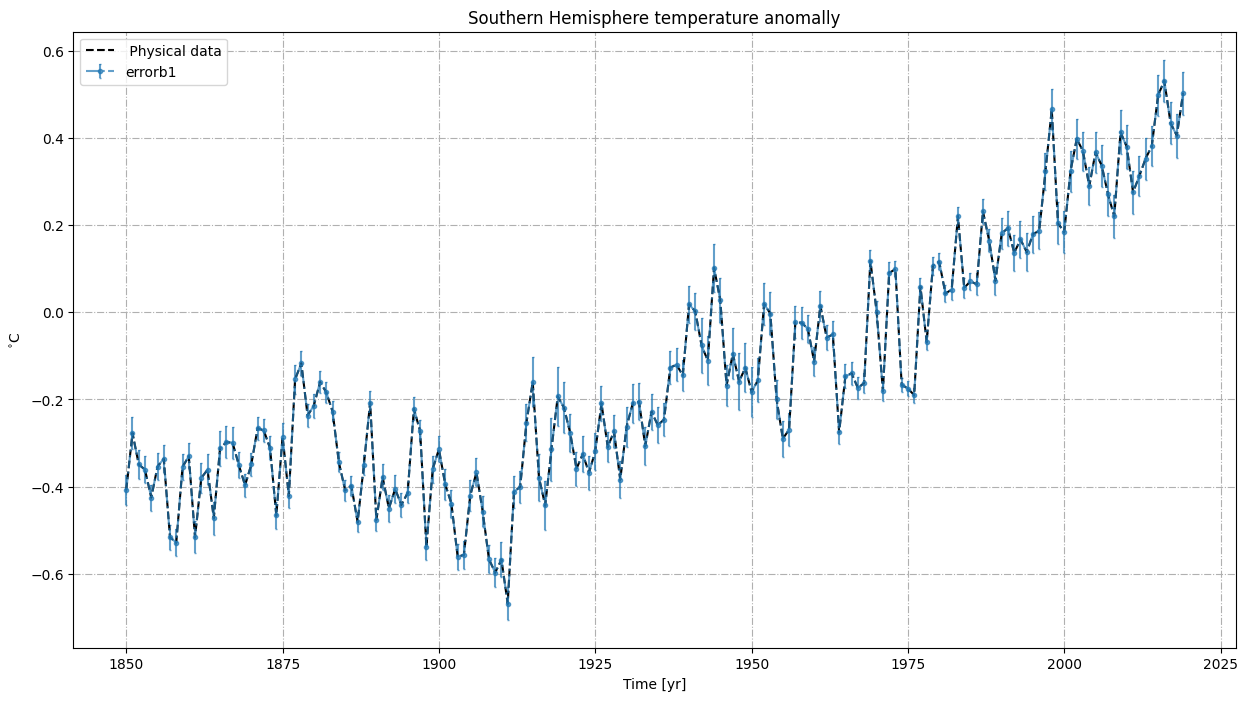

In [66]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Southern Hemisphere temperature anomally')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\rm ^{\circ}C$')

#The plots:
#Plot the physical model
plt.errorbar(year, medianTemp, y_errors,capsize=1, alpha=0.7, marker = ".", label='errorb1', linestyle = "-.")

plt.plot(year, medianTemp, color = "k", label=' Physical data', linestyle='--')

#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

In [67]:
# Call the curve_fit() function
coef_temp_anomally_year, cova_temp_anomally_year = opt.curve_fit(linear_fit_real, year, medianTemp)
print(coef_temp_anomally_year)

# Calculate uncertainties
unc_coef_temp_anomally_year = np.sqrt(np.diag(cova_temp_anomally_year))

print("The associated uncertainty are:\n", unc_coef_temp_anomally_year)
# print(newarray_delsumF[0], newarray_medianTemp.shape)

[ 4.78932095e-03 -9.40441196e+00]
The associated uncertainty are:
 [2.25538689e-04 4.36444957e-01]


In [68]:
position_fit_anom_temp_year = linear_fit_real(year, *coef_temp_anomally_year)

In [69]:
# Extrapolate data to t=10s.
time_ext_temp_anom_year = 2100.

# Evaluate the model -> Extrapolated position
position_ext_temp_anom_year = linear_fit_real(time_ext_temp_anom_year, *coef_temp_anomally_year)

print(position_ext_temp_anom_year)

# Generate a new vector for time
new_time_temp_anom_year = np.linspace(year[0], time_ext_temp_anom_year, 1000)

# Evaluate the model
new_posi_temp_anom_year = linear_fit_real(new_time_temp_anom_year, *coef_temp_anomally_year)

print(new_posi_temp_anom_year.shape)

0.6531620284765296
(1000,)


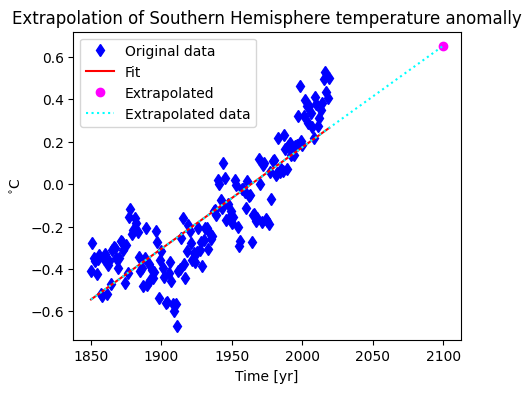

In [70]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(year,medianTemp,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(year,position_fit_anom_temp_year,color='red', linestyle="-", label="Fit")
plt.plot(time_ext_temp_anom_year, position_ext_temp_anom_year, color = "magenta", marker = "o", linestyle=" ", label="Extrapolated")

plt.plot(new_time_temp_anom_year,new_posi_temp_anom_year,color='aqua', linestyle=":", label ="Extrapolated data")#, label ="Extrapolated data"

plt.title(r'Extrapolation of Southern Hemisphere temperature anomally')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\rm ^{\circ}C$')
plt.legend()

plt.show()

### (c) Since you want to study the correlation between the global radiative forcing ($\Delta F_{\rm total}$) from problem 2 and the sea temperature anomaly, both series need to cover the same time period in years. Use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Then, create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- Total radiative forcing ($\Delta F_{\rm total}$)

- Sea temperature anomaly 

- $2\sigma$ error in the sea temperature anommaly



In [71]:
if years_array.max()<=year.max():
    max_both_arrays = years_array.max()
else:
    max_both_arrays = year.max()

if years_array.min()<=year.min():
    min_both_arrays = year.min()
else:
    min_both_arrays = years_array.min()
 
print("maybe this work:", max_both_arrays, min_both_arrays)
length_both_array= max_both_arrays-min_both_arrays
print(length_both_array)
j=0
for i in years_array:
    if min_both_arrays == years_array[j]:
        print("The position is: ", j)
        print("The year is:", years_array[length_both_array])
        newarray_delsumF = delsumF[j:length_both_array+1]
        
    j=j+1
j=0
for i in year:
    if min_both_arrays == year[j]:
        print("The position is: ", j)
        
        print("The year is:", year[length_both_array+j])
        newarray_medianTemp = medianTemp[j: length_both_array+j+1]
        new_array_y_errors = y_errors[j: length_both_array+j+1]
    j=j+1
newarray_justforyears = np.arange(min_both_arrays,max_both_arrays+1,1)
print(new_array_y_errors.shape,newarray_delsumF.shape, newarray_medianTemp.shape, newarray_justforyears.shape)

maybe this work: 2019 1979
40
The position is:  0
The year is: 2019
The position is:  129
The year is: 2019
(41,) (41,) (41,) (41,)


In [72]:
correlation_radiative_forcing_sea_temp_df = pd.DataFrame({"Year": newarray_justforyears, 
                      r"Total radiative forcing ($\Delta F_{\rm total}$)": newarray_delsumF, 
                      "Sea temperature anomaly": newarray_medianTemp,
                      r"$2\sigma$ error in the sea temperature anommaly": new_array_y_errors})
# Let's see
# correlation_radiative_forcing_sea_temp_df.head(41)

In [73]:
# And get it as a csv file
correlation_radiative_forcing_sea_temp_df.to_csv('correlation_radiative_forcing_sea_temp_df.csv')

### (d) Make a labeled scatter plot (using markers) of the sea temperature anomaly (including the $2\sigma$ y-error bars) versus the total radiative forcing ($\Delta F_{\rm total}$. What trend/s do you see?


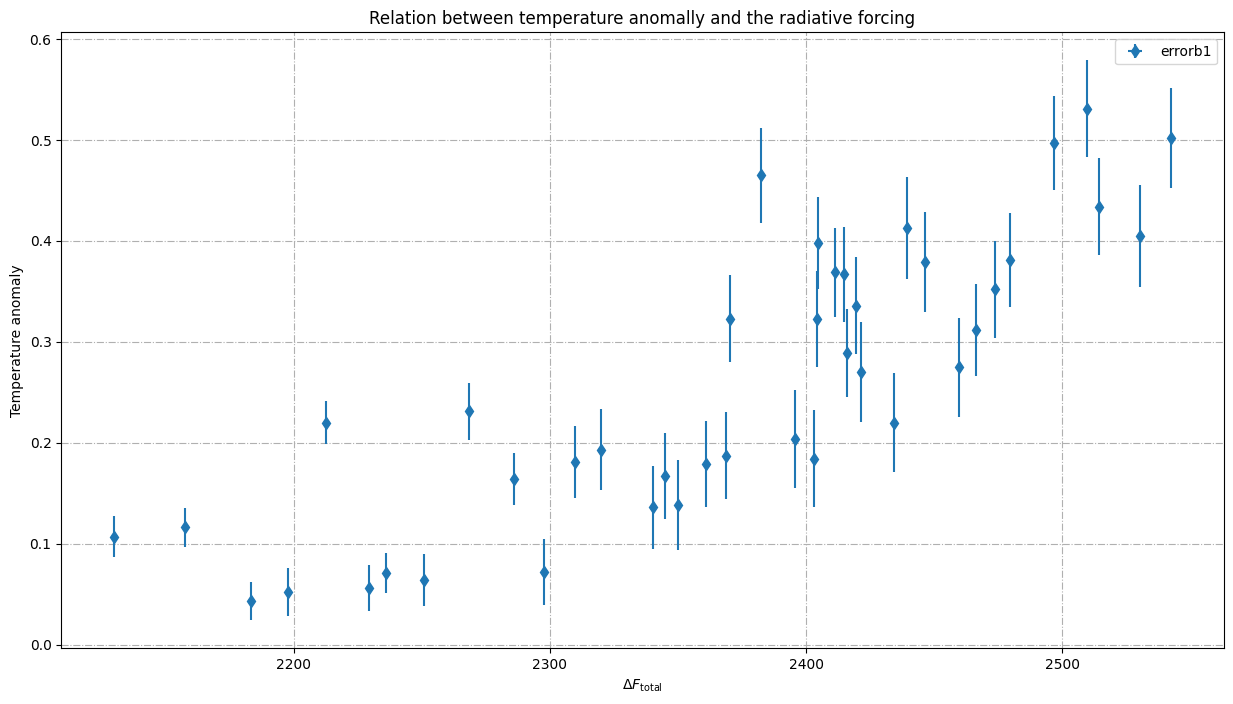

In [74]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Relation between temperature anomally and the radiative forcing')
plt.xlabel(r'$\Delta F_{\rm total}$')
plt.ylabel(r'Temperature anomaly')

#The plots:
#Plot the physical model
plt.errorbar(newarray_delsumF, newarray_medianTemp, new_array_y_errors, 0, marker = "d", label='errorb1', linestyle = "")

# plt.plot(year, medianTemp, color = "k", label=' Physical data', linestyle='--')

#To show the label, grid and the image
plt.grid(linestyle='-.')
plt.legend()
plt.show()
plt.close()

### (e) Assume a linear model and carry out a regression. Report the resulting equation and figure showing the original data, the linear fit, and the literature prediction line: $\Delta T_{\rm sea}=k\,\Delta F_{\rm total}$, where $k=0.29\pm0.08\,\rm ^{\circ}C\,m^2/W$. How well does your regression result compare to the literature? Briefly discuss your results.

In [75]:
def linear_fit(delsumF, k):
    y_values = k * delsumF
    return y_values

In [76]:
def linear_fit_real(delsumF, m,b):
    y_values = m* delsumF+b
    return y_values

In [77]:
#from literature
# Call the curve_fit function

coef_temp_anomally, cova_temp_anomally = opt.curve_fit(linear_fit, newarray_delsumF, newarray_medianTemp, p0=100, sigma =new_array_y_errors)

print(coef_temp_anomally)

# Calculate uncertainties
unc_coef_temp_anomally = np.sqrt(np.diag(cova_temp_anomally))

print("The associated uncertainty are:\n", unc_coef_temp_anomally)
print(newarray_delsumF[0], newarray_medianTemp.shape)

[8.23617498e-05]
The associated uncertainty are:
 [8.47865161e-06]
2129.9825255655924 (41,)


In [78]:
#from literature
# Call the curve_fit function
coef_temp_anomally_lin, cova_temp_anomally_lin = opt.curve_fit(linear_fit_real, newarray_delsumF, newarray_medianTemp)

print(coef_temp_anomally_lin)

# Calculate uncertainties
unc_coef_temp_anomally_lin = np.sqrt(np.diag(cova_temp_anomally_lin))

print("The associated uncertainty are:\n", unc_coef_temp_anomally_lin)
# print(newarray_delsumF.shape, newarray_medianTemp.shape)

[ 1.08214795e-03 -2.30366935e+00]
The associated uncertainty are:
 [1.15367096e-04 2.73441770e-01]


In [79]:
# Evaluate in the regression model according iterature
linear_fit_ev = linear_fit(newarray_delsumF, coef_temp_anomally)

#Evaluate in linear model
linear_model_temp_anom = linear_fit_real(newarray_delsumF, *coef_temp_anomally_lin)
# print(linear_model_temp_anom)


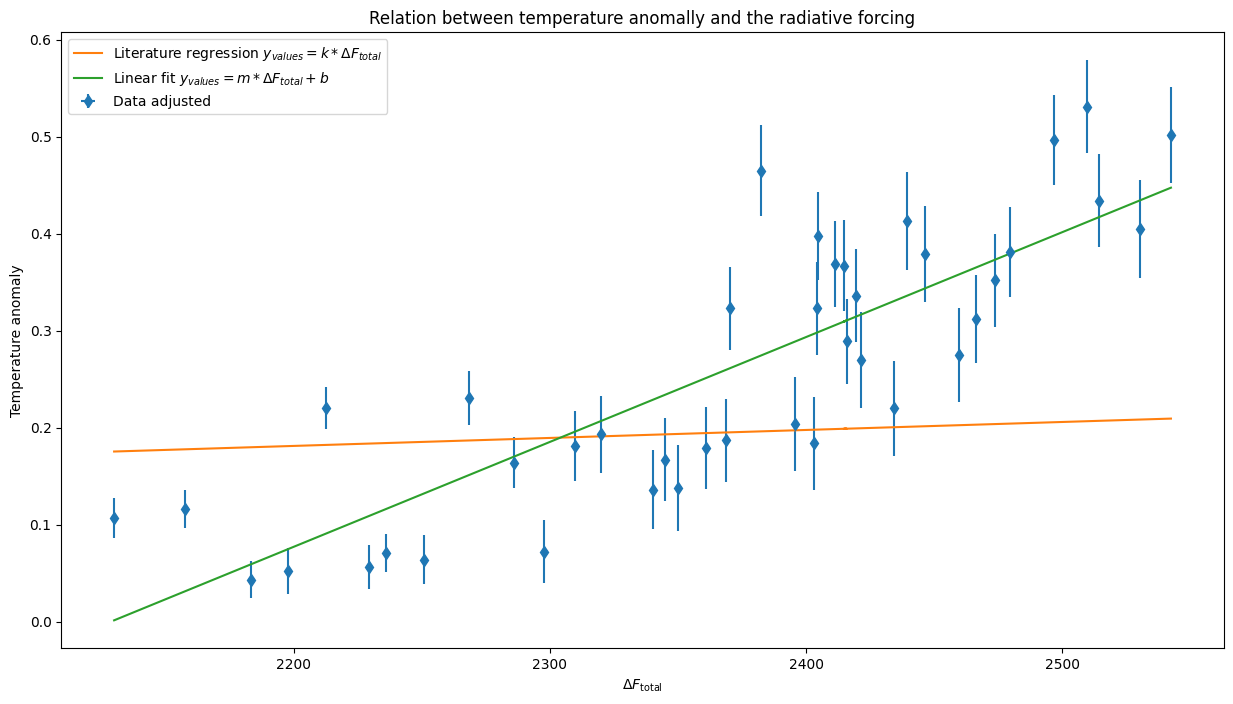

In [80]:
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Relation between temperature anomally and the radiative forcing')
plt.xlabel(r'$\Delta F_{\rm total}$')
plt.ylabel(r'Temperature anomaly')

plt.errorbar(newarray_delsumF, newarray_medianTemp, new_array_y_errors, 0, marker = "d", label='Data adjusted', linestyle = "")

# plt.scatter(newarray_delsumF, newarray_medianTemp, label='Data adjusted',color = "red")

plt.plot(newarray_delsumF, linear_fit_ev, label=r'Literature regression $y_{values}=k*\Delta F_{total}$')
plt.plot(newarray_delsumF, linear_model_temp_anom, label=r'Linear fit $y_{values}=m*\Delta F_{total}+b$')
# plt.errorbar(newarray_delsumF, newarray_medianTemp, 2*new_array_y_errors, 0, marker = ".", linestyle = " ")
plt.legend()
plt.show()

In [81]:
print(f"The comparison between the k value obtained is {coef_temp_anomally[0]} and for the linear model is: {coef_temp_anomally_lin[0]}")
print("\n")
print("The values foe each equation are:")
print(f"Literature: k={coef_temp_anomally[0]} +/- {unc_coef_temp_anomally}")

print(f"Linear model: k={coef_temp_anomally_lin[0]} +/- {unc_coef_temp_anomally_lin}")

print("In comparison to k=0.29 +/- 0.08, the nearest value is from the linear model, but shows a huge error.")

The comparison between the k value obtained is 8.236174975963646e-05 and for the linear model is: 0.0010821479532094939


The values foe each equation are:
Literature: k=8.236174975963646e-05 +/- [8.47865161e-06]
Linear model: k=0.0010821479532094939 +/- [1.15367096e-04 2.73441770e-01]
In comparison to k=0.29 +/- 0.08, the nearest value is from the linear model, but shows a huge error.


### (f) Finally, you will make predictions for the future. Imagine the observed trends in greenhouse concentrations will continue in the next years. Use your regression model to predict $\Delta T_{\rm sea}$ in the years $2050$ and $2100$ via extrapolation. Report your results with uncertainties and show the expected trends in a figure. How much will the sea temperature have increased by those two years with respect to the reference SST?

#### Extrapolate one data from Extrapolation of total radiative forcing ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$)


Extra Steps to make the extrapolation

In [82]:
def linear_fit_real(delsumF, m,b):
    y_values = m* delsumF+b
    return y_values

In [83]:
# Call the curve_fit() function
coef_radiat_f, cova_radiat_f = opt.curve_fit(linear_fit_real, years_array, delsumF)
print(coef_radiat_f)

# Calculate uncertainties
unc_coef_radiat_f = np.sqrt(np.diag(cova_radiat_f))

print("The associated uncertainty are:\n", unc_coef_radiat_f)
# print(newarray_delsumF[0], newarray_medianTemp.shape)

[ 8.91079342e+00 -1.54437920e+04]
The associated uncertainty are:
 [2.46841152e-01 4.93939547e+02]


In [84]:
position_fit = linear_fit_real(years_array, *coef_radiat_f)

In [85]:
# Extrapolate data to t=10s.
time_extinitial_Forc =2050
time_ext = 2100.

# Evaluate the model -> Extrapolated position
position_ext = linear_fit_real(time_ext, *coef_radiat_f)

print(position_ext)
print(years_array[0])
# Generate a new vector for time
new_time_all_space = np.linspace(years_array[0], time_ext, 1000)
new_time = np.linspace(time_extinitial_Forc, time_ext, 1000)

# Evaluate the model
new_posi = linear_fit_real(new_time, *coef_radiat_f)
pos_all_space = linear_fit_real(new_time_all_space, *coef_radiat_f)

print(new_posi.shape)

3268.8741955127934
1979
(1000,)


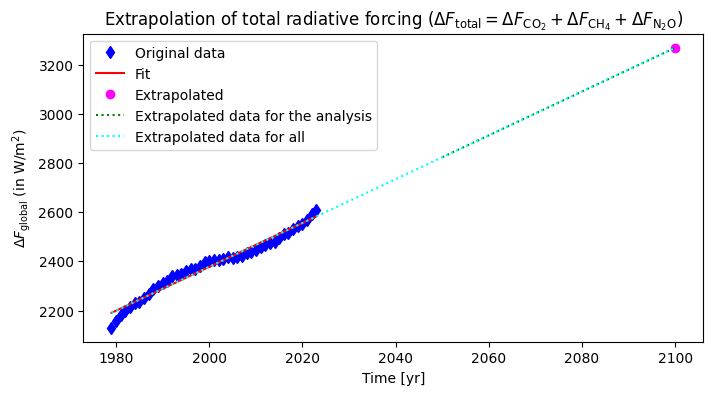

In [86]:
# And now we plot
plt.figure(figsize=(8,4))

plt.plot(years_array,delsumF,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(years_array,position_fit,color='red', linestyle="-", label="Fit")
plt.plot(time_ext, position_ext, color = "magenta", marker = "o", linestyle=" ", label="Extrapolated")

plt.plot(new_time,new_posi,color='green', linestyle=":", label ="Extrapolated data for the analysis")#, label ="Extrapolated data"

plt.plot(new_time_all_space,pos_all_space,color='aqua', linestyle=":", label ="Extrapolated data for all")#, label ="Extrapolated data"

plt.title(r'Extrapolation of total radiative forcing ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$)')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\Delta F_{\rm global}$ (in $\rm W/m^2$)')
plt.legend()

plt.show()

#### Extrapolate one data from Temperature anomally vs Yr:


In [87]:
# Call the curve_fit() function
coef_temp_anomally_year, cova_temp_anomally_year = opt.curve_fit(linear_fit_real, year, medianTemp)
print(coef_temp_anomally_year)

# Calculate uncertainties
unc_coef_temp_anomally_year = np.sqrt(np.diag(cova_temp_anomally_year))

print("The associated uncertainty are:\n", unc_coef_temp_anomally_year)
# print(newarray_delsumF[0], newarray_medianTemp.shape)

[ 4.78932095e-03 -9.40441196e+00]
The associated uncertainty are:
 [2.25538689e-04 4.36444957e-01]


In [88]:
position_fit_anom_temp_year = linear_fit_real(year, *coef_temp_anomally_year)

In [89]:
# Extrapolate data to t=10s.
time_ext_temp_anom_year = 2100.

# Evaluate the model -> Extrapolated position
position_ext_temp_anom_year = linear_fit_real(time_ext_temp_anom_year, *coef_temp_anomally_year)

print(position_ext_temp_anom_year)

# Generate a new vector for time
new_time_temp_anom_year = np.linspace(year[0], time_ext_temp_anom_year, 1000)

# Evaluate the model
new_posi_temp_anom_year = linear_fit_real(new_time_temp_anom_year, *coef_temp_anomally_year)

print(new_posi_temp_anom_year.shape)

0.6531620284765296
(1000,)


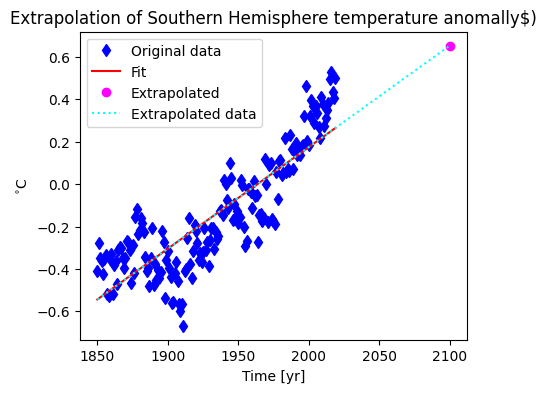

In [90]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(year,medianTemp,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(year,position_fit_anom_temp_year,color='red', linestyle="-", label="Fit")
plt.plot(time_ext_temp_anom_year, position_ext_temp_anom_year, color = "magenta", marker = "o", linestyle=" ", label="Extrapolated")

plt.plot(new_time_temp_anom_year,new_posi_temp_anom_year,color='aqua', linestyle=":", label ="Extrapolated data")#, label ="Extrapolated data"

plt.title(r'Extrapolation of Southern Hemisphere temperature anomally$)')
plt.xlabel('Time [yr]')
plt.ylabel(r'$\rm ^{\circ}C$')
plt.legend()

plt.show()

#### Extrapolation anomally temp and radiative Force

In [91]:
def linear_fit_real(delsumF, m,b):
    y_values = m* delsumF+b
    return y_values

In [92]:
linear_model_temp_anom_extrapolated = linear_fit_real(pos_all_space, coef_temp_anomally_lin[0],coef_temp_anomally_lin[1])
pos2050=linear_fit_real(new_posi[0], coef_temp_anomally_lin[0],coef_temp_anomally_lin[1])


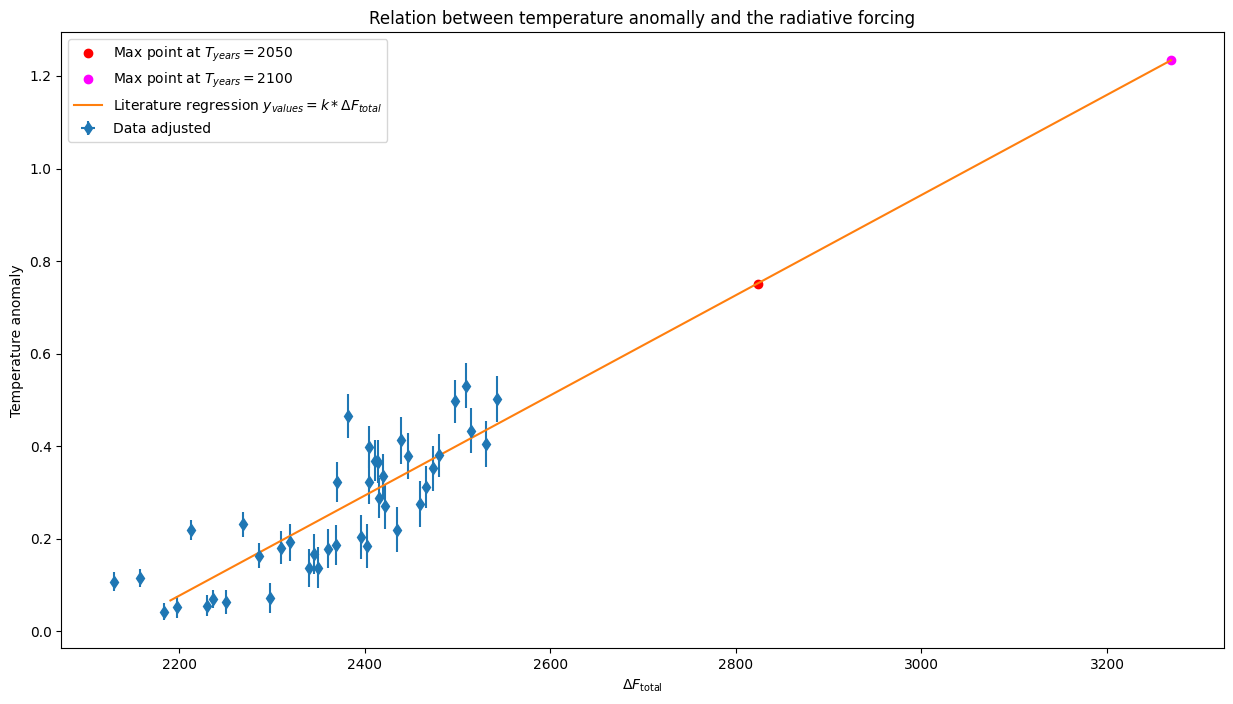

In [93]:
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Relation between temperature anomally and the radiative forcing')
plt.xlabel(r'$\Delta F_{\rm total}$')
plt.ylabel(r'Temperature anomaly')

plt.errorbar(newarray_delsumF, newarray_medianTemp, new_array_y_errors, 0, marker = "d", label='Data adjusted', linestyle = "")


plt.plot(new_posi[0], pos2050, color = "red", marker = "o", linestyle=" ", label=r"Max point at $T_{years}=2050$")

plt.plot(pos_all_space[-1], linear_model_temp_anom_extrapolated[-1], color = "magenta", marker = "o", linestyle=" ", label=r"Max point at $T_{years}=2100$")
plt.plot(pos_all_space, linear_model_temp_anom_extrapolated, label=r'Literature regression $y_{values}=k*\Delta F_{total}$')

plt.legend()
plt.show()

In [94]:
dif= linear_model_temp_anom_extrapolated[-1]-pos2050
print("The difference got in temperature anomally between 2050 and 2100 in [celsius degrees] is:", dif)

The difference got in temperature anomally between 2050 and 2100 in [celsius degrees] is: 0.4821398430619839
